# Считывание графа и запись его в csv формат

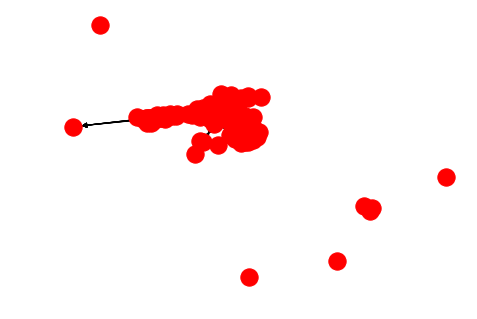

In [124]:
# Считывание графа
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas
G=nx.read_gexf('friends.gexf')
nx.draw(G) 
plt.draw()  

# Получение матрицы смежности и списков смежности ориентированного и неориентированного графов
G_matrix = nx.to_numpy_matrix(G)
G_undir_matrix = nx.to_numpy_matrix(G.to_undirected())
G_list = nx.to_dict_of_lists(G)
G_undir_list = nx.to_dict_of_lists(G.to_undirected())
G_pd = nx.to_pandas_adjacency(G)

# Запись матрицы смежности в csv формат 
import pandas as pd 
G_pd.to_csv('matrix.csv')

# Запись списка смежности в csv формат 
new_list = []
for i, ls in G_list.items():
    ls.insert(0, i)
    new_list.append(ls)
import csv
with open('list.csv', 'w') as f:
    writer = csv.writer(f)
    for i in new_list:
        writer.writerow(i)

# Первый пункт

In [125]:
# Поиск в глубину(через список смежности)
def dfs(v, matrix):
    if v not in stack:
        stack.append(v)
    for i in matrix[(v)]:
        if i not in comp and i not in stack:
            dfs(i, matrix)
            return
    comp.append(stack.pop())
    if stack != []:
        dfs(stack[-1], matrix)

In [146]:
# Подсчет количества компонент слабой связности и количества вершин в них с помощью поиска в глубину
my_list = []
count = 0
st = []
while (set(st) != set(G_undir_list.keys())):
    stack = []
    comp = []
    dfs(list(set(G_undir_list.keys()).difference(set(st)))[0], G_undir_list)
    if count == 0:
        my_list += comp
    st += comp
    print('Вершин в {} компоненте слабой связности:'.format(count+1), len(comp))
    count += 1
print('Количество слабых компонент связности:', count)

Вершин в 1 компоненте слабой связности: 173
Вершин в 2 компоненте слабой связности: 1
Вершин в 3 компоненте слабой связности: 3
Вершин в 4 компоненте слабой связности: 1
Вершин в 5 компоненте слабой связности: 1
Вершин в 6 компоненте слабой связности: 1
Количество слабых компонент связности: 6


In [148]:
# Подсчет количества компонент сильной связности и количества вершин в них с помощью поиска в глубину
count = 0
G_reversed = nx.reverse_view(G)
G_list_reversed = nx.to_dict_of_lists(G_reversed)
tout = []
comp_count = 0
while (set(tout) != set(G_undir_list.keys())):
    stack = []
    comp = []
    dfs(list(set(G_undir_list.keys()).difference(set(tout)))[0], G_undir_list)
    comp_count += 1
    tout += comp
while(len(tout)!=0):
    stack = []
    comp = []
    if len(tout)>1:
        dfs(tout[-1], G_list_reversed)
        for i in comp:
            del G_list_reversed[i]
            tout.remove(i)
    else: 
        comp = [tout[-1]]
        tout = []
    count += 1
    print('Вершин в {} компоненте сильной связности:'.format(count), len(comp))
print('Количество сильных компонент связности:', comp_count + 1)

Вершин в 1 компоненте сильной связности: 1
Вершин в 2 компоненте сильной связности: 1
Вершин в 3 компоненте сильной связности: 1
Вершин в 4 компоненте сильной связности: 3
Вершин в 5 компоненте сильной связности: 1
Вершин в 6 компоненте сильной связности: 172
Вершин в 7 компоненте сильной связности: 1
Количество сильных компонент связности: 7


In [149]:
173/180

0.9611111111111111

# Второй пункт

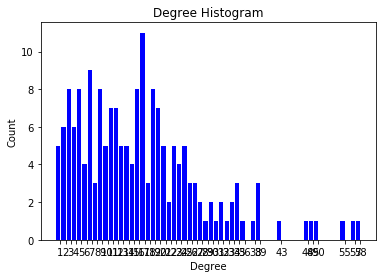

In [158]:
import collections

degree_sequence = sorted([len(i) for i in G_list.values()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg);

In [12]:
# Получение наибольшей компоненты связности для дальнейшего рассмотрения(в my_list при поиске в глубину мы сохранили 
# все индексы, состоящие в наибольшей компоненте связности)
G_main_comp_list = {}
G_main_comp_list.update(G_undir_list)
bad_fields = set(G_undir_list.keys()).difference(set(my_list))
for i in bad_fields:
    if i in G_main_comp_list.keys():
        G_main_comp_list.pop(i)

for i in G_main_comp_list.values():
    for j in bad_fields:
        if j in i:
            i.remove(j)
            
G_main_comp = nx.from_dict_of_lists(G_main_comp_list)
G_main_comp_matrix = nx.to_numpy_matrix(G_main_comp)
indexes = list(nx.to_pandas_adjacency(G_main_comp))

In [13]:
# Функция, реализующая алгоритм Флойда-Воршалла для нахождения кратчайших расстояний между вершинами
from math import inf

def floyd_vor(G):
    for i in range(G.shape[0]):
        for j in range(G.shape[0]):
            if G[i, j] == 0:
                G[i, j] = inf
        G[i, i] = 1
    for k in range(G.shape[0]):
        for i in range(G.shape[0]):
            for j in range(G.shape[0]):
                G[i, j] = min(G[i, j], G[i, k] + G[k, j])

In [14]:
G_distance = G_main_comp_matrix.copy()
floyd_vor(G_distance)

In [15]:
print(G_distance)

[[1. 1. 3. ... 4. 3. 3.]
 [1. 1. 2. ... 4. 2. 3.]
 [3. 2. 1. ... 4. 2. 3.]
 ...
 [4. 4. 4. ... 1. 5. 3.]
 [3. 2. 2. ... 5. 1. 3.]
 [3. 3. 3. ... 3. 3. 1.]]


In [16]:
diametr = np.max(G_distance[:])
print(diametr)

6.0


In [17]:
radius = min([np.max(i) for i in G_distance])
print(radius)

3.0


In [18]:
periphery = [i for i in range(G_distance.shape[0]) if np.max(G_distance[i]) == diametr]
print(periphery)
for i in periphery:
    print(indexes[i])

[4, 8, 10, 90, 126, 142, 154, 157, 158, 159, 160, 166, 167, 168, 170]
10703524
19656532
23358624
104280591
154857676
208242311
305570022
320148751
323578278
327624557
328766153
380297657
442730793
458868266
463252382


In [19]:
center = [i for i in range(G_distance.shape[0]) if np.max(G_distance[i]) == radius]
print(center)
for i in center:
    print(indexes[i])

[22]
32879395


In [20]:
mean = np.mean(G_distance)
print(mean)

2.5973136422867453


# Третий пункт

In [21]:
def N(id):
    return G_main_comp_list[id]

In [22]:
def mera(Graph, func):
    for i in G_main_comp_list.keys():
        for j in G_main_comp_list.keys():
            Graph[indexes.index(i), indexes.index(j)] = func(i, j)

In [23]:
def common_neighbors(i, j):
    return len(set(N(i)).intersection(set(N(j))))

In [24]:
def jaccard_coefficient(i, j):
    return len(set(N(i)).intersection(set(N(j))))/len(set(N(i)).union(set(N(j))))

In [76]:
from math import log
def adamic_adar(i, j):
    return sum([1/log(len(N(k))) if len(N(k))!=1 else 0 for k in set(N(i)).intersection(set(N(j)))])

In [69]:
def preferential_attachment(i, j):
    return len(N(i))*len(N(j))

In [93]:
mera1 = np.zeros((173, 173))
mera(mera1, common_neighbors)
print(mera1)
res = pd.DataFrame(mera1, index=indexes)
res.to_csv('common_neighbors.csv', header=indexes)

[[ 7.  0.  0. ...  0.  0.  0.]
 [ 0. 18.  9. ...  0.  4.  0.]
 [ 0.  9. 15. ...  0.  2.  0.]
 ...
 [ 0.  0.  0. ...  4.  0.  0.]
 [ 0.  4.  2. ...  0.  4.  0.]
 [ 0.  0.  0. ...  0.  0. 20.]]


In [94]:
mera2 = np.zeros((173, 173))
mera(mera2, jaccard_coefficient)
print(mera2)
res = pd.DataFrame(mera2, index=indexes)
res.to_csv('jaccard_coefficient.csv', header=indexes)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.375      ... 0.         0.22222222 0.        ]
 [0.         0.375      1.         ... 0.         0.11764706 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.22222222 0.11764706 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [95]:
mera3 = np.zeros((173, 173))
mera(mera3, adamic_adar)
print(mera3)
res = pd.DataFrame(mera3, index=indexes)
res.to_csv('adamic_adar.csv', header=indexes)

[[2.45879351 0.         0.         ... 0.         0.         0.        ]
 [0.         6.1458673  2.77773486 ... 0.         1.20908378 0.        ]
 [0.         2.77773486 5.15956941 ... 0.         0.56253283 0.        ]
 ...
 [0.         0.         0.         ... 2.35591269 0.         0.        ]
 [0.         1.20908378 0.56253283 ... 0.         1.20908378 0.        ]
 [0.         0.         0.         ... 0.         0.         6.41434863]]


In [96]:
mera4 = np.zeros((173, 173))
mera(mera4, preferential_attachment)
print(mera4)
res = pd.DataFrame(mera4, index=indexes)
res.to_csv('preferential_attachment.csv', header=indexes)

[[ 49. 126. 105. ...  28.  28. 140.]
 [126. 324. 270. ...  72.  72. 360.]
 [105. 270. 225. ...  60.  60. 300.]
 ...
 [ 28.  72.  60. ...  16.  16.  80.]
 [ 28.  72.  60. ...  16.  16.  80.]
 [140. 360. 300. ...  80.  80. 400.]]


# Четвертый пункт

In [38]:
def degree_centrality(id):
    return len(G_main_comp_list[id])/(len(G_main_comp_list.keys())-1)

In [33]:
def closeness_centrality(id):
    return (len(G_main_comp_list.keys()) - 1)/(np.sum(G_distance[indexes.index(id)])-
                                               G_distance[indexes.index(id), indexes.index(id)])

In [34]:
def betweenness_centrality(id):
    pass

In [35]:
vector = np.linalg.eig(G_main_comp_matrix)[1][:,[np.linalg.eig(G_main_comp_matrix)[0].argmax(axis=0)]]
def eigenvector_centrality(id):
    return vector[indexes.index(id)]

In [41]:
def edge_betweenness(id):
    pass

In [36]:
def metrics_count(d, metric):
    for i in indexes:
        d.update({i: metric(i)})

In [42]:
degree = {}
metrics_count(degree, degree_centrality)

In [45]:
closeness = {}
metrics_count(closeness, closeness_centrality)

In [46]:
betweenness = {}

In [62]:
eigenvector = {}
metrics_count(eigenvector, eigenvector_centrality)
for key, val in eigenvector.items():
    eigenvector[key] = val[0,0]

In [63]:
edge = {}

In [92]:
between = nx.betweenness_centrality(G2)

In [96]:
edges = nx.edge_betweenness_centrality(G2)